In [20]:
import pickle
from scipy import signal
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import math

%matplotlib inline

In [21]:
cache_file_path = "/home/cuong/drive/code/grape-drf-plotter/output/g2plots/2024-04-08_W2NAF_g2plots_2.ba.pkl"

In [22]:
df = pickle.load(open(cache_file_path, 'rb'))

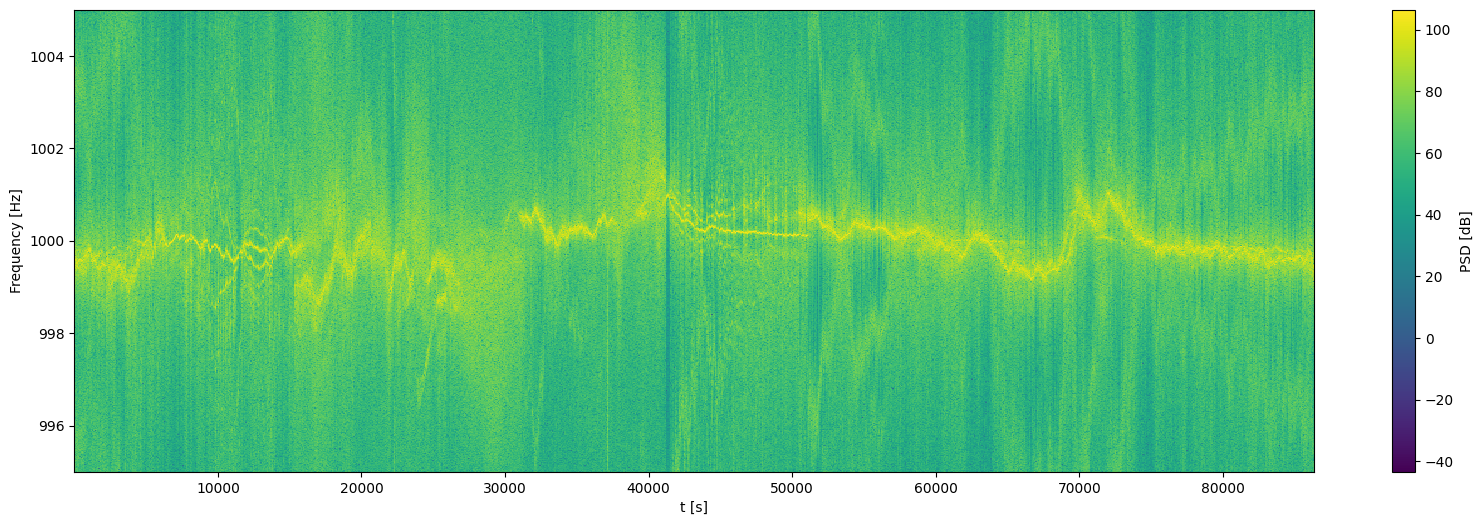

In [23]:
fs = 8000

f, t_spec, Sxx = signal.spectrogram(df, fs=fs, window='hann', nperseg=int(fs / 0.01))
Sxx_db = 10 * np.log10(Sxx)

flim = (995, 1005)
fig = plt.figure(figsize=(20, 6))
ax = fig.add_subplot(1, 1, 1)
mpbl = ax.pcolormesh(t_spec, f, Sxx_db)
cbar = fig.colorbar(mpbl, label='PSD [dB]')
ax.set_xlabel('t [s]')
ax.set_ylabel('Frequency [Hz]')
ax.set_ylim(flim)
plt.show()

In [24]:
fs = 8000
t = np.arange(0, 3600 * 24, 1 / fs)
f_c = 1000
bandwidth = 10
new_sig = df * np.cos(2 * np.pi * int(f_c - bandwidth/2.) * t)
f, t_spec, Sxx = signal.spectrogram(
    new_sig, fs=fs, window="hann", nperseg=int(fs / 0.01)
)
Sxx_db = 10 * np.log10(Sxx)
print(f.shape, t_spec.shape, Sxx_db.shape)

(400001,) (987,) (400001, 987)


In [25]:
# flim = (5, 15)
# fig = plt.figure(figsize=(20, 6))
# ax = fig.add_subplot(1, 1, 1)
# mpbl = ax.pcolormesh(t_spec, f, Sxx_db)
# cbar = fig.colorbar(mpbl, label="PSD [dB]")
# ax.set_xlabel("t [s]")
# ax.set_ylabel("Frequency [Hz]")
# ax.set_ylim(flim)

In [26]:
resampled_fs = int(bandwidth*2)
decimation_factor = math.ceil(fs / resampled_fs)
resampled_signal = signal.decimate(new_sig, decimation_factor, ftype="fir", zero_phase=True)
print(resampled_fs)

20


In [27]:
f, t_spec, Sxx = signal.spectrogram(
    resampled_signal, fs=resampled_fs, window="hann", nperseg=int(resampled_fs / 0.01)
)
Sxx_db = 10 * np.log10(Sxx)
print(f.shape, t_spec.shape, Sxx_db.shape)

(1001,) (987,) (1001, 987)


(0.0, 10.0)

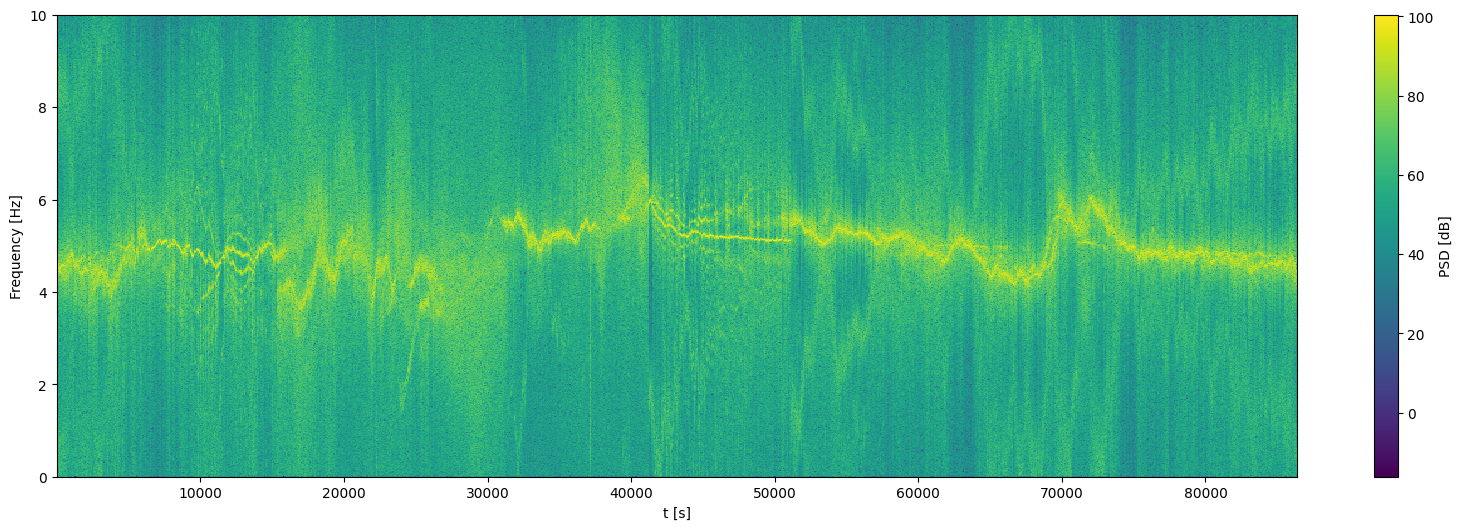

In [28]:
flim = (0, bandwidth)
fig = plt.figure(figsize=(20, 6))
ax = fig.add_subplot(1, 1, 1)
mpbl = ax.pcolormesh(t_spec, f, Sxx_db)
cbar = fig.colorbar(mpbl, label="PSD [dB]")
ax.set_xlabel("t [s]")
ax.set_ylabel("Frequency [Hz]")
ax.set_ylim(flim)